In [1]:
#read in dna from text file

def read_dna(dna_file):
  dna_data=""
  count=0
  with open(dna_file, "r") as file:
    for line in file:
      if (line[0:1] !='>') and count < 7000:
        dna_data+=(line.strip('\n')).upper()
        count+=1
        #dna_data.append(line.strip('\n'))
     
  return dna_data

#separates dna into strands of specified length

def generate_samples(dna_data):
  sample_list=[];
  for i in range(0,len(dna_data),300):
    sample_list.append(dna_data[i:i+300])  
     
  return sample_list 
    

def dna_codons(dna,seq_len):
#for each fragment, it creates codons of length num (num = 3 in real dna)
  codons=[]
  for j in range(0,len(dna),seq_len):
    if (j+seq_len) <= len(dna):
      codons.append(dna[j:j+seq_len])
  return codons


def nt_dict_array(codon_list,num):
#given the codon length, it counts the frequency for each permutation (given codon length) in fragment
#returns frequency of each permutation in the fragment as array
  import numpy as np  
  from collections import Counter
  nt=['A','C','G','T']
  r1=range(0,4)  
  if num ==1:
    perm=['A','C','G','T']
  elif num == 2:
    perm=[nt[i]+nt[j] for i in r1 for j in r1]  
  elif num == 3:
    perm=[nt[i]+nt[j]+nt[k] for i in r1 for j in r1 for k in r1]  
  elif num == 4:
    perm=[nt[i]+nt[j]+nt[k]+nt[l] for i in r1 for j in r1 for k in r1 for l in r1]  
  sample_array=np.zeros(4**num)
  lst=Counter(codon_list)
  for i in range(0,4**num):
    sample_array[i]=lst[perm[i]]
  return sample_array

def Xmatrix_generator(dna_data,num,filename):
#generates matrix (mxn array) with frequency of codons (m = 4**num total) for each fragment (n total)
  import csv
  import numpy as np
  Xmatrix=np.zeros((4**num,len(dna_data)))
  
  for i in range(0,len(dna_data)):
    Xmatrix[:,i]= nt_dict_array(dna_data[i],num)  
  myFile = open(filename, 'w')
  with myFile:
    writer = csv.writer(myFile)
    writer.writerows(Xmatrix)
    
  return Xmatrix  

def Seq_Analysis(readfile,num,outfile):
#import in the dna file and separates it into fragment lengths of 300
#for each fragment, it creates codons of length num (num = 3 in real dna)
#
  import csv
  import numpy as np
  x=read_dna(readfile)
  strand_samples=generate_samples(x)
  dna_data=[dna_codons(strand_samples[i],num) for i in range(0,len(strand_samples))]
  Xmatrix_generator(dna_data,num,outfile)

In [2]:
#Reads in file and outputs frequencies

import numpy as np
#x=read_dna('FragmentCresentusGenome.txt')
x=read_dna('/Users/suzannempittman/Desktop/Pseudomonas_aeruginosa_genomic.txt') 

strand_samples=generate_samples(x)

#Seq_Analysis('Dmelanogaster_1998data.txt',3,'Xmatrix_num3.csv')
file_name='Pseudomonas_aeruginosa_genomic.txt'

Seq_Analysis(file_name,4,'Xmatrix_num4pa.csv')
Seq_Analysis(file_name,3,'Xmatrix_num3pa.csv')
Seq_Analysis(file_name,2,'Xmatrix_num2pa.csv')
Seq_Analysis(file_name,1,'Xmatrix_num1pa.csv')

#Seq_Analysis('FragmentCresentusGenome.txt',3,'Xmatrix_num3fc.csv')



import csv


#reads in frequency matrices for fragments in each case
reader = csv.reader(open("Xmatrix_num3pa.csv", "r"), delimiter=",")
x = list(reader)
result = np.array(x).astype("float")

reader = csv.reader(open("Xmatrix_num1pa.csv", "r"), delimiter=",")
x = list(reader)
result1 = np.array(x).astype("float")

reader = csv.reader(open("Xmatrix_num2pa.csv", "r"), delimiter=",")
x = list(reader)
result2 = np.array(x).astype("float")

reader = csv.reader(open("Xmatrix_num4pa.csv", "r"), delimiter=",")
x = list(reader)
result4 = np.array(x).astype("float")


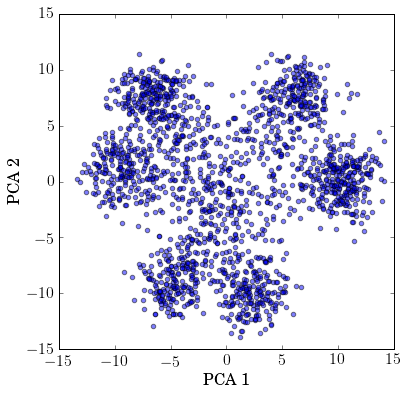

In [6]:
from sklearn.decomposition import PCA as sklearnPCA
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 16})
plt.rc('text', usetex=True)
plt.rc('font', family='serif')


sklearn_pca = sklearnPCA(n_components=2)
sklearn_pcahigh = sklearnPCA(n_components=3)


sklearn_transf = sklearn_pca.fit_transform(result.T)
sklearn_transf2 = sklearn_pca.fit_transform(result2.T)
sklearn_transf4 = sklearn_pca.fit_transform(result4.T)
sklearn_transf1 = sklearn_pca.fit_transform(result1.T)

fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(111)
ax1.set_aspect(aspect=1)
ax1.scatter(sklearn_transf[:,0],sklearn_transf[:,1], alpha=0.5)

ax1.set_xlabel('PCA 1')
ax1.set_ylabel('PCA 2')
plt.xlim(-15,15)
plt.ylim(-15,15)

plt.show()

#fig.savefig('pca_pa.pdf', bbox_inches='tight')"""


In [ ]:
dof

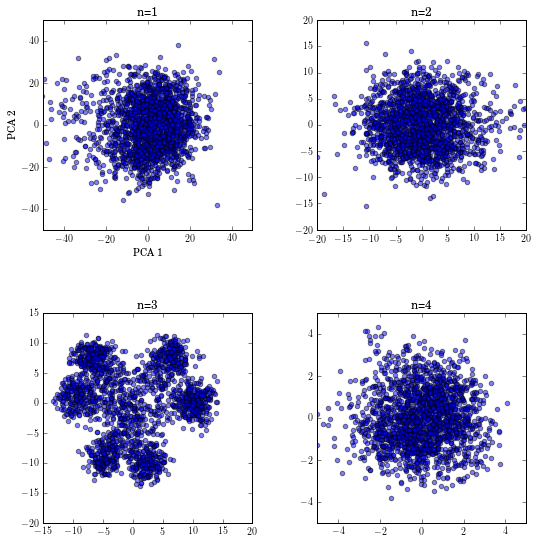

In [4]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
#plt.rcParams.update({'font.size': 16})
#plt.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
%matplotlib inline

f, axarr = plt.subplots(2, 2,figsize=(9,9))
axarr[0, 0].scatter(sklearn_transf1[:,0],sklearn_transf1[:,1], alpha=0.5)
axarr[0, 0].set_title('n=1')
axarr[0, 0].set_xlim(-50,50)
axarr[0, 0].set_ylim(-50,50)
axarr[0, 0].set_aspect(aspect=1)
axarr[0, 0].set_xlabel('PCA 1')
axarr[0, 0].set_ylabel('PCA 2')
axarr[0, 1].scatter(sklearn_transf2[:,0],sklearn_transf2[:,1], alpha=0.5)
axarr[0, 1].set_title('n=2')
axarr[0, 1].set_aspect(aspect=1)
axarr[0, 1].set_xlim(-20,20)
axarr[0, 1].set_ylim(-20,20)
axarr[1, 0].scatter(sklearn_transf[:,0],sklearn_transf[:,1], alpha=0.5)
axarr[1, 0].set_title('n=3')
axarr[1, 0].set_aspect(aspect=1)
axarr[1, 1].scatter(sklearn_transf4[:,0],sklearn_transf4[:,1], alpha=0.5)
axarr[1, 1].set_title('n=4')
axarr[1, 1].set_aspect(aspect=1)
axarr[1, 1].set_xlim(-5,5)
axarr[1, 1].set_ylim(-5,5)
#rcParams['axes.titlepad'] = 10 

f.subplots_adjust(hspace=0.4)
plt.show()
#f.savefig('pca_varyn_pa.pdf', bbox_inches='tight')

-60


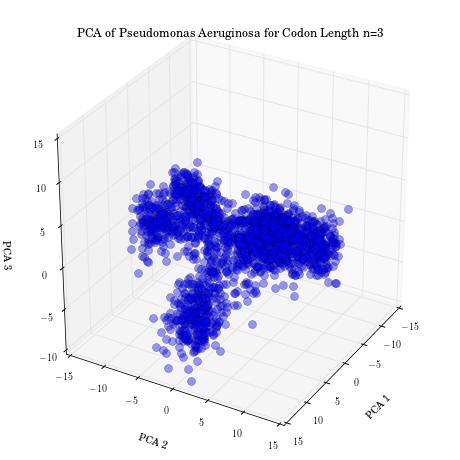

In [5]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

sklearn_transfhigh = sklearn_pcahigh.fit_transform(result.T)


fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 12 
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 15
ax.zaxis.labelpad = 15
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.plot(sklearn_transfhigh[:,0], sklearn_transfhigh[:,1], sklearn_transfhigh[:,2], 'o', markersize=8, color='blue', alpha=.4, label='F1')
points = [[2, 4,0], [2, 8,0], [4, 8,0]]
#line = ax.Polygon(points, closed=None, fill=None, edgecolor='r')




plt.title('PCA of Pseudomonas Aeruginosa for Codon Length n=3')
print(ax.azim)
ax.view_init(azim=30)
plt.show()


#fig.savefig('pca_3D_pa.pdf', bbox_inches='tight')


In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7, random_state=0).fit(sklearn_transfhigh)
kmeans.labels_
verts=kmeans.cluster_centers_

print(verts)


newv=np.array([[-8.87579345, 0.91079849, -1.35589311],
               [5.93239497, 7.27712557,  4.8712727],
               [ 2.18938251,  -9.41567288,  1.43147084],
               [-8.87579345, 0.91079849, -1.35589311]])

newv2=np.array([[-4.38516157,  -8.33349744,  1.49076673],
               [-6.14825491, 7.09527292, -1.23503452],
               [ 9.86527432, 0.14376281, -3.88562218],
               [-4.38516157, - 8.33349744,  1.49076673]])


[[ 2.18938253 -9.41567288  1.43129158]
 [-8.87579345  0.91079851 -1.35572641]
 [ 0.02700456 -0.21699033 -0.02290759]
 [-4.38516157 -8.33349745  1.4907197 ]
 [ 9.86527432  0.14376282 -3.88542328]
 [ 5.93239498  7.27712557  4.87118442]
 [-6.1482549   7.09527291 -1.23509184]]


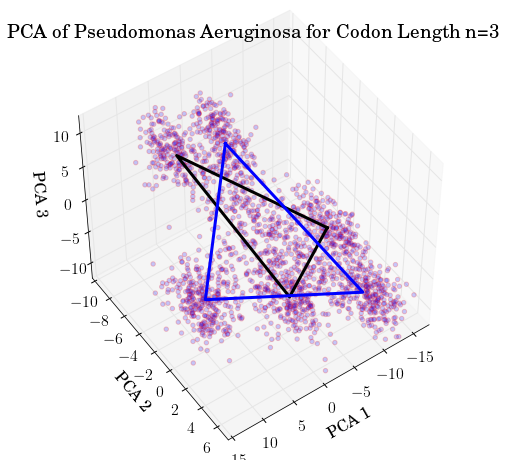

In [15]:

from mpl_toolkits.mplot3d import Axes3D 
from mpl_toolkits.mplot3d.art3d import Poly3DCollection 
import matplotlib.pyplot as plt 

fig = plt.figure(figsize=(8,8))

#ax = Axes3D(fig) 
ax = fig.add_subplot(111, projection='3d')

 
#verts = [list(zip(x,y,z))] 
ax.xaxis.labelpad = 10 
ax.yaxis.labelpad = 10
ax.zaxis.labelpad = 10 
ax.set_xlabel('PCA 1') 
ax.set_ylabel('PCA 2') 
ax.set_zlabel('PCA 3') 
ax.set_xlim(-17,15)
ax.set_ylim(-10,7)
ax.set_zlim(-12,12)
#ax.view_init(azim=60)
ax.azim = 55
ax.elev = 50

ax.scatter(sklearn_transfhigh[:,0], sklearn_transfhigh[:,1], sklearn_transfhigh[:,2], 'o',  color='red', alpha=.2, label='F1') 
ax.plot(newv[:,0], newv[:,1], newv[:,2], '-',  color='k',linewidth=3.0) 
ax.plot(newv2[:,0], newv2[:,1], newv2[:,2], '-',  color='b',linewidth=3.0) 

plt.title('PCA of Pseudomonas Aeruginosa for Codon Length n=3')

#ax.plot(sklearn_transfhigh[:,0], sklearn_transfhigh[:,1], sklearn_transfhigh[:,2], 'o', markersize=8, color='blue', alpha=.4, label='F1') 
#ax.add_collection3d(Poly3DCollection(verty)) 
plt.show()
fig.savefig('pca_3D_pa_star.pdf', bbox_inches='tight')



In [16]:
newv_2d=np.array([[-8.87579345, 0.91079849],
               [5.93239497, 7.27712557],
               [ 2.18938251,  -9.41567288],
               [-8.87579345, 0.91079849]])

newv2_2d=np.array([[-4.38516157,  -8.33349744],
               [-6.14825491, 7.09527292],
               [ 9.86527432, 0.14376281],
               [-4.38516157,  -8.33349744]])


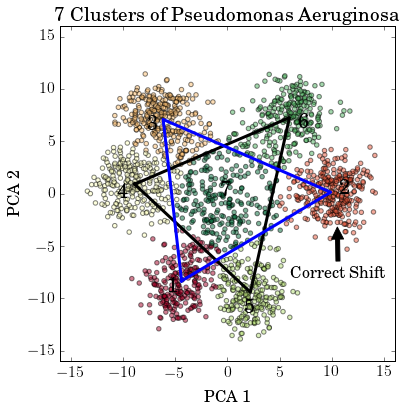

In [47]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
plt.rcParams.update({'font.size': 16})

random_state = 1234

y_pred = KMeans(n_clusters=7, random_state=random_state).fit_predict(sklearn_transf)
fig = plt.figure(figsize=(6,6))
plt.rcParams['font.size'] = 16

ax1 = fig.add_subplot(111)
ax1.set_aspect(aspect=1)
ax1.scatter(sklearn_transf[:, 0], sklearn_transf[:, 1],cmap='RdYlGn',c=y_pred,alpha=0.5)
ax1.plot(newv[:,0], newv[:,1], '-',  color='k',linewidth=3.0) 
ax1.plot(newv2[:,0], newv2[:,1], '-',  color='b',linewidth=3.0) 

plt.xlim(-16, 16)
plt.ylim(-16, 16)
ax1.set_title('7 Clusters of Pseudomonas Aeruginosa')
ax1.set_xlabel('PCA 1')
ax1.set_ylabel('PCA 2')
ax1.annotate('Correct Shift', xy=(10.5, -3), xytext=(6, -8),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax1.xaxis.labelpad = 10
ax1.yaxis.labelpad = 6

ax1.text(verts[0,0]-0.6,verts[0,1]-1.9, '5', fontsize=20,fontweight='bold')
ax1.text(verts[1,0]-1.7,verts[1,1]-1.35, '4', fontsize=20,fontweight='bold')
ax1.text(verts[2,0]-0.6,verts[2,1], '7', fontsize=20,fontweight='bold')
ax1.text(verts[3,0]-1.3,verts[3,1]-1.1, '1', fontsize=20,fontweight='bold')
ax1.text(verts[4,0]+0.8,verts[4,1]-0.2, '2', fontsize=20,fontweight='bold')
ax1.text(verts[5,0]+0.8,verts[5,1]-1, '6', fontsize=20,fontweight='bold')
ax1.text(verts[6,0]-1.5,verts[6,1]-1, '3', fontsize=20,fontweight='bold')




plt.show()
#fig.savefig('7clusters_pa.pdf', bbox_inches='tight')


In [37]:
#plots each fragment of dna with a color
x=read_dna('Pseudomonas_aeruginosa_genomic.txt') 

strand_samples=generate_samples(x)

colors = [124,202,215,228,191,76,2]

for i in range(0,7):
 #html_print(cstr(strand_samples[i], colors[y_pred[i]]))
 print('\033[38;5;%dm%s\x1b[0m' %(colors[i],i+1),end='' )

print('')    
    
for i in range(0,60):
 #html_print(cstr(strand_samples[i], colors[y_pred[i]]))
 print('\033[38;5;%dm%s\x1b[0m' %(colors[y_pred[i]],strand_samples[i]),end='' )

1234567
TTTAAAGAGACCGGCGATTCTAGTGAAATCGAACGGGCAGGTCAATTTCCAACCAGCGATGACGTAATAGATAGATACAAGGAAGTCATTTTTCTTTTAAAGGATAGAAACGGTTAATGCTCTTGGGACGGCGCTTTTCTGTGCATAACTCGATGAAGCCCAGCAATTGCGTGTTTCTCCGGCAGGCAAAAGGTTGTCGAGAACCGGTGTCGAGGCTGTTTCCTTCCTGAGCGAAGCCTGGGGATGAACGAGATGGTTATCCACAGCGGTTTTTTCCACACGGCTGTGCGCAGGGATGTACCCCCTTCAAAGCAAGGGTTATCCACAAAGTCCAGGACGACCGTCCGTCGGCCTGCCTGCTTTTATTAAGGTCTTGATTTGCTTGGGGCCTCAGCGCATCGGCATGTGGATAAGTCCGGCCCGTCCGGCTACAATAGGCGCTTATTTCGTTGTGCCGCCTTTCCAATCTTTGGGGGATATCCGTGTCCGTGGAACTTTGGCAGCAGTGCGTGGATCTTCTCCGCGATGAGCTGCCGTCCCAACAATTCAACACCTGGATCCGTCCCTTGCAGGTCGAAGCCGAAGGCGACGAATTGCGTGTGTATGCACCCAACCGTTTCGTCCTCGATTGGGTGAACGAGAAATACCTCGGTCGGCTTCTGGAACTGCTCGGTGAACGCGGCGAGGGTCAGTTGCCCGCGCTTTCCTTATTAATAGGCAGCAAGCGTAGCCGTACGCCGCGCGCCGCCATCGTCCCATCGCAGACCCACGTGGCTCCCCCGCCTCCGGTTGCTCCGCCGCCGGCGCCAGTGCAGCCGGTATCGGCCGCGCCCGTGGTAGTGCCACGTGAAGAGCTGCCGCCAGTGACGACGGCTCCCAGCGTGTCGAGCGATCCCTACGAGCCGGAAGAACCCAGCATCGATCCGCTGGCCGCCGCCATGCCGGCTGGAGCAGCGCCTGCGGTGCGCACCGAGCGCAACGTCCAGGTCGAA

In [22]:


def end_codon_count(end_codon,codon_list,cluster_pred):
  from operator import itemgetter
  #creates a list of tuple of end codon frequency and cluster number
  lst=[(codon_list[i].count(end_codon),cluster_pred[i]) for i in range(0,len(codon_list))]
  #sorts lst by cluster number so that we can find total end codon count
  lst.sort(key=itemgetter(1))
  #makes into array since it is easier to perform operations on columns and rows of array
  lstarray=np.array(lst)
  clusterind=[np.where(lstarray[:,1]==j)[0][1] for j in range(7)]
  clusterind.append(len(lst)-1)
  #calculates the mean instances of end codon, given the number of data points in each cluster
  meanend_codon_count=[np.sum(lstarray[clusterind[i]:clusterind[i+1],0])/(clusterind[i+1]-clusterind[i]) for i in range(len(clusterind)-1)] 
  #calculates the total instances of end codon, given the number of data points in each cluster
  #end_codon_count=[np.sum(lstarray[clusterind[i]:clusterind[i+1],0]) for i in range(len(clusterind)-1)] 
  return np.array(meanend_codon_count)
  #return np.array(clusterind)


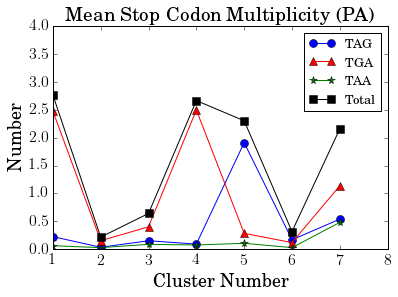

In [23]:
#generate dna_data to be used for plot below and mutual information calculation
dna_data=[dna_codons(strand_samples[i],3) for i in range(0,len(strand_samples))]


a1=end_codon_count('TAG',dna_data,y_pred)
a2=end_codon_count('TGA',dna_data,y_pred)
a3=end_codon_count('TAA',dna_data,y_pred)
a4=a1+a2+a3
x=np.array(list(range(1,8)))
fig = plt.figure(figsize=(8,8))
fig, ax = plt.subplots()

plt.rcParams['legend.fontsize'] = 13   
ax.plot(x,a1, 'o-', markersize=8, color='blue', label='TAG')
ax.plot(x,a2, '^-', markersize=8, color='red',  label='TGA')
ax.plot(x,a3, '*-', markersize=8, color='green', label='TAA')
ax.plot(x,a4, 's-',markersize=8,color='black',  label='Total')
ax.set_title('Mean Stop Codon Multiplicity (PA)')
ax.set_xlabel('Cluster Number',fontsize=18)
ax.set_ylabel('Number',fontsize=18)
plt.xlim(1, 8)
plt.ylim(0, 4)
ax.legend(loc='upper right')
fig.savefig('Stop_pa.pdf', bbox_inches='tight')

plt.show()


In [24]:
nt=['A','C','G','T']
from collections import Counter

permlist1=[];
for i in range(4):
  permlist1.append([nt[i]+nt[j]+nt[k] for j in range(0,4) for k in range(0,4)])  

permlist2=[];
for i in range(4):
  permlist2.append([nt[j]+nt[i]+nt[k] for j in range(0,4) for k in range(0,4)])  


permlist3=[];
for i in range(4):
  permlist3.append([nt[j]+nt[k]+nt[i] for j in range(0,4) for k in range(0,4)])  





lst=Counter(dna_data[0])

sumList1=[];
for j in range(4):
  sumList1.append(sum([lst[permlist1[j][i]] for i in range(16)]))

d1=dict(zip(nt,sumList1))


sumList2=[];
for j in range(4):
  sumList2.append(sum([lst[permlist2[j][i]] for i in range(16)]))
d2=dict(zip(nt,sumList2))

sumList3=[];
for j in range(4):
  sumList3.append(sum([lst[permlist3[j][i]] for i in range(16)]))
d3=dict(zip(nt,sumList3))

perm3=[nt[i]+nt[j]+nt[k] for i in range(0,4) for j in range(0,4) for k in range(0,4)]  






In [26]:
nt=['A','C','G','T']
from collections import Counter


dna_data=[dna_codons(strand_samples[i],3) for i in range(0,len(strand_samples))]

perm3=[nt[i]+nt[j]+nt[k] for i in range(0,4) for j in range(0,4) for k in range(0,4)]  
ldna=len(dna_data[0])

cluster_mi=[]

for k in range(len(dna_data)):
  lst=Counter(dna_data[k])
  nonrandstr=list(''.join(dna_data[k]))
  lst2=Counter(nonrandstr)

 

  mi_sum=0
  
  for i in range(64):
   if lst[perm3[i]]>0:   
     mi_sum+=lst[perm3[i]]*np.log((3**3)*(ldna**2)*lst[perm3[i]]/(lst2[perm3[i][0]]*lst2[perm3[i][1]]*lst2[perm3[i][2]]))/ldna
  
  cluster_mi.append((mi_sum,y_pred[k]))


In [27]:
from operator import itemgetter
cluster_mi.sort(key=itemgetter(1))

clustmi_array=np.array(cluster_mi)
clusterind=[np.where(clustmi_array[:,1]==j)[0][0] for j in range(7)]
clusterind.append(len(cluster_mi)-1)
mean_mi=[np.sum(clustmi_array[clusterind[i]:clusterind[i+1],0])/(clusterind[i+1]-clusterind[i]) for i in range(len(clusterind)-1)] 


/Users/suzannempittman/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


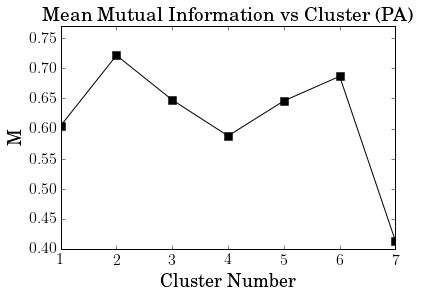

In [31]:

fig = plt.figure(figsize=(8,8))
fig, ax = plt.subplots()

#plt.rcParams['legend.fontsize'] = 10   
ax.plot(x,np.array(mean_mi),'s-',markersize=8,color='black')

plt.title('Mean Mutual Information vs Cluster (PA)')
ax.legend(loc='upper left')
ax.set_xlabel('Cluster Number',fontsize=18)
ax.set_ylabel('M',fontsize=18)

plt.xlim(1, 7)
plt.ylim(0.4, 0.77)

#ax.grid(True, which='both')
#fig.savefig('MI_pa.pdf', bbox_inches='tight')


plt.show()

In [33]:
#Since we aren't getting MI=0 for noncoding region in dna, double-check that we can for truly random strand
#Let's check that the Mutual Information Asymptotes to Zero for Truly Random Strand

randnt=np.random.randint(0,4,100000)

randstrandlist=[nt[randnt[i]] for i in range(len(randnt))]

randstrand=''.join(randstrandlist)


codons=[]
for j in range(0,len(randstrand),3):
  if (j+3) <= len(randstrand):
    codons.append(randstrand[j:j+3])
ldna=len(codons)
    
lst=Counter(codons)
  
sumList1=[];
for j in range(4):
  sumList1.append(sum([lst[permlist1[j][i]] for i in range(16)]))

d1=dict(zip(nt,sumList1))

sumList2=[];
for j in range(4):
  sumList2.append(sum([lst[permlist2[j][i]] for i in range(16)]))
d2=dict(zip(nt,sumList2))

sumList3=[];
for j in range(4):
  sumList3.append(sum([lst[permlist3[j][i]] for i in range(16)]))
d3=dict(zip(nt,sumList3))
  
  #print(d3)  

mi_sum=0
  
for i in range(64):
  if lst[perm3[i]]>0:   
     mi_sum+=lst[perm3[i]]*np.log(ldna**2*lst[perm3[i]]/(d1[perm3[i][0]]*d2[perm3[i][1]]*d3[perm3[i][2]]))/ldna
  
print(mi_sum)

0.000869181728736


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from operator import itemgetter

from collections import Counter

nt=['A','C','G','T']
from collections import Counter

permlist1=[];
for i in range(4):
  permlist1.append([nt[i]+nt[j]+nt[k] for j in range(0,4) for k in range(0,4)])  

permlist2=[];
for i in range(4):
  permlist2.append([nt[j]+nt[i]+nt[k] for j in range(0,4) for k in range(0,4)])  


permlist3=[];
for i in range(4):
  permlist3.append([nt[j]+nt[k]+nt[i] for j in range(0,4) for k in range(0,4)])  



perm3=[nt[i]+nt[j]+nt[k] for i in range(0,4) for j in range(0,4) for k in range(0,4)]  


cluster_mi=[]



#nonrandcodon=['ACG','CTA']
#nonrandcodon=['ACG','CTA','GAT']
nonrandcodon=['ATG','CAT','GCA','TGC']
#nonrandcodon=['ACG','AGT','CTA','GAT','TGT']

#nonrandcodon=['ACG']*5000
ldna=len(nonrandcodon)
    
lst=Counter(nonrandcodon)
  
sumList1=[];
for j in range(4):
  sumList1.append(sum([lst[permlist1[j][i]] for i in range(16)]))

print(sumList1)


d1=dict(zip(nt,sumList1))

sumList2=[];
for j in range(4):
  sumList2.append(sum([lst[permlist2[j][i]] for i in range(16)]))
d2=dict(zip(nt,sumList2))

sumList3=[];
for j in range(4):
  sumList3.append(sum([lst[permlist3[j][i]] for i in range(16)]))
d3=dict(zip(nt,sumList3))
  
  #print(d3)  

mi_sum=0


for i in range(64):
  if lst[perm3[i]]>0:   
     mi_sum+=lst[perm3[i]]*np.log(ldna**2*lst[perm3[i]]/(d1[perm3[i][0]]*d2[perm3[i][1]]*d3[perm3[i][2]]))/ldna
  
print(mi_sum)

[1, 1, 1, 1]
2.77258872224


In [36]:
np.log(0.25/(0.25**3))


2.7725887222397811